In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
s_train = pd.read_csv('datasets/train.csv')
s_test = pd.read_csv('datasets/test.csv')

In [3]:
def clean_header(df):
    
    '''This function removes wierd characters and spaces from columns and keeps everything lowercase'''
    
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')','')

In [4]:
# clean header script
clean_header(s_train)
clean_header(s_test)
s_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
s_train.isnull().sum()

id                0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage    330
               ... 
misc_val          0
mo_sold           0
yr_sold           0
sale_type         0
saleprice         0
Length: 81, dtype: int64

In [6]:
s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']] = s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']].apply(lambda x: x.astype(str).str.lower().fillna(0))
s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']] = s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']].apply(lambda x: x.astype(str).str.lower().fillna(0))

In [7]:
s_test['exter_qual'].head()

0    ta
1    ta
2    gd
3    gd
4    ta
Name: exter_qual, dtype: object

In [8]:
# Changing like qualitative data to numeric for easier analysis 
s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']] = s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']].replace({'ex':1, 'gd':2, 'ta':3, 'fa':4, 'po':5, 'na':0, 'nan':0})
s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']] = s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']].replace({'ex':1, 'gd':2, 'ta':3, 'fa':4, 'po':5, 'na':0, 'nan':0})

In [9]:
s_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [10]:
s_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [11]:
qual_train_feat = pd.DataFrame(s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']])
qual_test_feat = pd.DataFrame(s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']])

In [12]:
type(qual_train_feat)

pandas.core.frame.DataFrame

In [13]:
#Trying out a very small model first. 
features = ['id', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']
X = s_train[features]
y = s_train['saleprice']
X_test_data = s_test[features]
print(X.describe())
print(y.describe())

                id   exter_qual   exter_cond    bsmt_qual    bsmt_cond  \
count  2051.000000  2051.000000  2051.000000  2051.000000  2051.000000   
mean   1474.033642     2.593857     2.914188     2.349098     2.909800   
std     843.980841     0.587962     0.372792     0.793278     0.569258   
min       1.000000     1.000000     1.000000     0.000000     0.000000   
25%     753.500000     2.000000     3.000000     2.000000     3.000000   
50%    1486.000000     3.000000     3.000000     2.000000     3.000000   
75%    2198.000000     3.000000     3.000000     3.000000     3.000000   
max    2930.000000     4.000000     5.000000     5.000000     5.000000   

       kitchen_qual  garage_qual  garage_cond  
count   2051.000000  2051.000000  2051.000000  
mean       2.482691     2.863481     2.856168  
std        0.665577     0.735104     0.726693  
min        1.000000     0.000000     0.000000  
25%        2.000000     3.000000     3.000000  
50%        3.000000     3.000000     3.000000

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=76)

In [15]:
# plt.figure(figsize=(15,15))
# sns.heatmap(s_train.corr(), annot=True)

In [16]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [17]:
X_scaled.shape

(1640, 8)

In [18]:
type(X_scaled)

numpy.ndarray

In [19]:
X_test_scaled.shape

(411, 8)

In [20]:
X_train.corr(),s_train['saleprice'].sort_values()

(                    id  exter_qual  exter_cond  bsmt_qual  bsmt_cond  \
 id            1.000000    0.072487    0.020333   0.062432  -0.015842   
 exter_qual    0.072487    1.000000    0.017577   0.512080  -0.025825   
 exter_cond    0.020333    0.017577    1.000000  -0.103488  -0.011619   
 bsmt_qual     0.062432    0.512080   -0.103488   1.000000   0.549012   
 bsmt_cond    -0.015842   -0.025825   -0.011619   0.549012   1.000000   
 kitchen_qual  0.073813    0.734934    0.031155   0.453548  -0.029285   
 garage_qual  -0.011937   -0.131296   -0.041461  -0.036317   0.032116   
 garage_cond  -0.011482   -0.143966   -0.034617  -0.037167   0.033905   
 
               kitchen_qual  garage_qual  garage_cond  
 id                0.073813    -0.011937    -0.011482  
 exter_qual        0.734934    -0.131296    -0.143966  
 exter_cond        0.031155    -0.041461    -0.034617  
 bsmt_qual         0.453548    -0.036317    -0.037167  
 bsmt_cond        -0.029285     0.032116     0.033905  
 kitc

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
lr_scores = cross_val_score(lr, X_scaled, y_train, cv=3)
lr_scores.mean()

0.6178106978022663

In [24]:
lasso = LassoCV(n_alphas=30)

In [25]:
lasso.fit(X_scaled, y_train)

LassoCV(n_alphas=30)

In [26]:
lasso.alpha_

57.565834323808375

In [27]:
np.shape(lasso.coef_)

(8,)

In [28]:
lasso_scores = cross_val_score(lasso, X_test_scaled, y_test, cv=3)
lasso_scores.mean()

0.5706251792989334

### Testing with Ridge Model ###

In [29]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [30]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.6176693732814913

In [31]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [32]:
ridge.score(X_train, y_train)

0.6217859233589613

In [33]:
ridge.score(X_test, y_test)

0.5785003915372644

In [34]:
ridge_scores.mean()

0.6176693732814913

In [35]:
pred = ridge.predict(X_test)
pred[:10]

array([348732.55674184, 156129.92226582, 128667.24199331, 211420.16033334,
       136240.76319995, 238792.04289465,  94024.67980314, 183744.4105693 ,
       238665.17731794, 143813.20775389])

In [36]:
residuals = y_test - pred

In [37]:
residuals

1885   -164882.556742
1532    -35379.922266
785      -1167.241993
1642    -65920.160333
853      20759.236800
            ...      
174        612.039970
411      52197.322113
1718     12449.933709
437      -1102.418125
1148    -14178.367405
Name: saleprice, Length: 411, dtype: float64

In [38]:
pred[:10]

array([348732.55674184, 156129.92226582, 128667.24199331, 211420.16033334,
       136240.76319995, 238792.04289465,  94024.67980314, 183744.4105693 ,
       238665.17731794, 143813.20775389])

In [39]:
r2_score(y_test, pred)

0.5785003915372644

<AxesSubplot:>

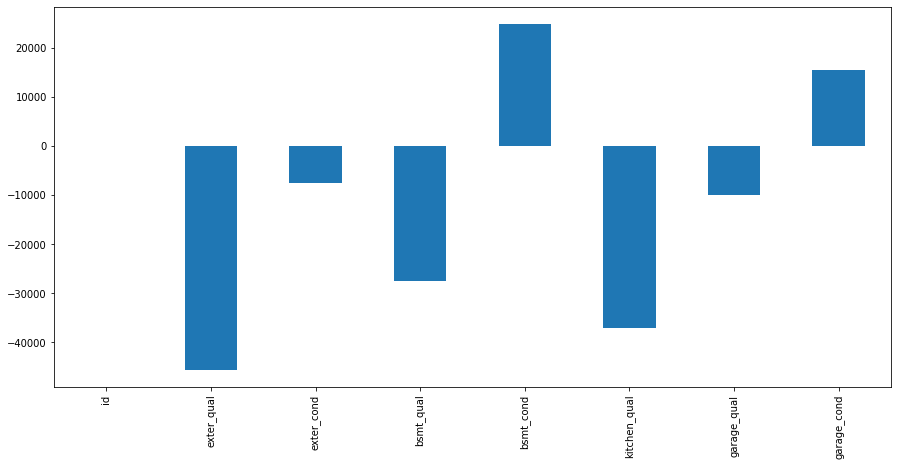

In [40]:
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7))

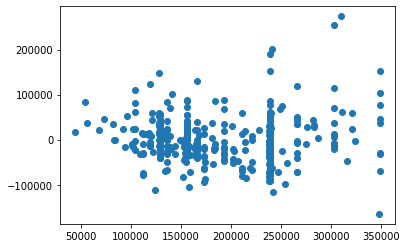

In [41]:
plt.scatter(pred, residuals)

In [42]:
ridge_df = pd.DataFrame([ridge.coef_, features], index = ['Coefficients', 'Features']).T
ridge_df = ridge_df.set_index('Features')
ridge_df['Coefficients'] = np.abs(ridge_df['Coefficients'])
ridge_df = ridge_df.sort_values(by='Coefficients',ascending=False)
ridge_df.head(10)

,Coefficients
Features,
exter_qual,45622.9
kitchen_qual,36993.6
bsmt_qual,27434.5
bsmt_cond,24796.5
garage_cond,15491.2
garage_qual,9967.72
exter_cond,7459.04
id,0.179442


Text(0.5, 0, 'Strenth of Predictor')

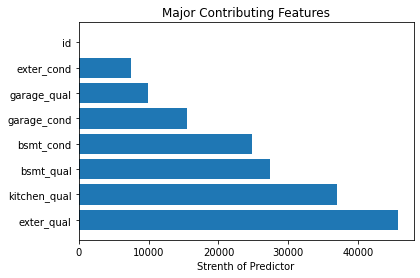

In [43]:
plt.barh(y=ridge_df.index[:10], width=ridge_df['Coefficients'][0:10]);
plt.title('Major Contributing Features')
plt.xlabel('Strenth of Predictor')

In [44]:
pred = ridge.predict(X_test)
residuals = y_test - pred
residuals[:5]  #look at the first fiveID

1885   -164882.556742
1532    -35379.922266
785      -1167.241993
1642    -65920.160333
853      20759.236800
Name: saleprice, dtype: float64

Text(0.5, 1.0, 'Distribution of Residuals')

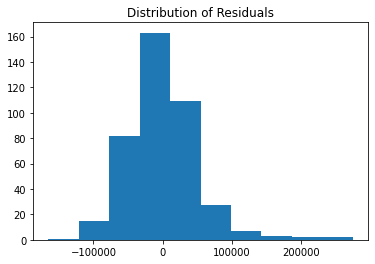

In [45]:
plt.hist(residuals);
plt.title('Distribution of Residuals')

In [46]:
sample_prices = y_test.values[0]
np.log(sample_prices)

12.121875486729419

Text(0.5, 1.0, 'Transformed Residuals')

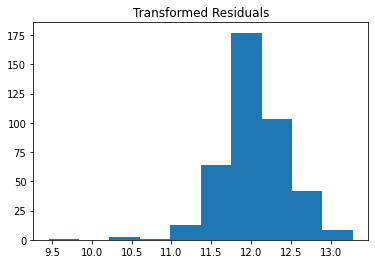

In [47]:
plt.hist(np.log(y_test));
plt.title('Transformed Residuals')

Text(0.5, 1.0, 'Comparing Predicted Prices with Residuals')

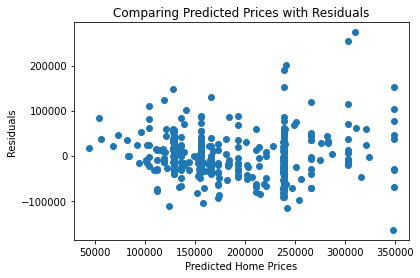

In [48]:
#interdcept 182000
#slope for quality is 19500
plt.scatter(x=pred,y=residuals)
plt.xlabel('Predicted Home Prices')
plt.ylabel('Residuals')
plt.title('Comparing Predicted Prices with Residuals')

# Now with Test data #

In [49]:
s_test.shape

(878, 80)

In [50]:
X_test_data.head()

,id,exter_qual,exter_cond,bsmt_qual,bsmt_cond,kitchen_qual,garage_qual,garage_cond
0,2658,3,4,4,3,4,5,5
1,2718,3,3,2,3,3,3,3
2,2414,2,3,2,2,2,3,3
3,1989,2,3,3,3,3,4,3
4,625,3,3,2,3,3,3,3


In [51]:
X_test_data.corr(),s_train['saleprice'].sort_values()

(                    id  exter_qual  exter_cond  bsmt_qual  bsmt_cond  \
 id            1.000000    0.018423   -0.011977   0.005535  -0.024879   
 exter_qual    0.018423    1.000000    0.016176   0.474682  -0.050067   
 exter_cond   -0.011977    0.016176    1.000000  -0.073146   0.059852   
 bsmt_qual     0.005535    0.474682   -0.073146   1.000000   0.515397   
 bsmt_cond    -0.024879   -0.050067    0.059852   0.515397   1.000000   
 kitchen_qual  0.022374    0.677035    0.039211   0.414835  -0.066872   
 garage_qual   0.034550   -0.113893   -0.029289   0.035840   0.067778   
 garage_cond   0.021028   -0.128664    0.006398   0.012266   0.069084   
 
               kitchen_qual  garage_qual  garage_cond  
 id                0.022374     0.034550     0.021028  
 exter_qual        0.677035    -0.113893    -0.128664  
 exter_cond        0.039211    -0.029289     0.006398  
 bsmt_qual         0.414835     0.035840     0.012266  
 bsmt_cond        -0.066872     0.067778     0.069084  
 kitc

In [52]:
test_pred = ridge.predict(X_test_data)

In [53]:
test_pred[:10]

array([ 67704.68298752, 155968.60380264, 213843.19533652, 164320.11659977,
       156344.1761535 , 128962.06539153, 128783.69992724, 168499.47717189,
       239055.82280663, 128740.45437704])

In [54]:
s_test['saleprice'] = test_pred

In [55]:
s_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,67704.682988
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,155968.603803
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,213843.195337
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,164320.116600
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,156344.176154


In [56]:
y_test_data = s_test['saleprice']

In [57]:
# Scale test set
X_td_scaled = sc.transform(X_test_data)
# y_td_scaled = sc.transform(y_test_data)

In [58]:
X_td_scaled.shape

(878, 8)

In [59]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100)).fit(X_td_scaled, y_test_data)
ridge

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [60]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.6176693732814913

In [61]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [62]:
ridge.score(X_train, y_train)

0.6217859233589613

In [63]:
ridge.score(X_test, y_test)

0.5785003915372644

In [64]:
ridge.score(X_td_scaled, y_test_data)

-11.543608136604453

In [65]:
s_test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [66]:
s_test.rename(columns={'id': 'ID', 'saleprice': 'SalePrice'}, errors="raise", inplace=True)

In [67]:
submission = s_test[['ID', 'SalePrice']]

In [68]:
submission.to_csv('datasets/submission_1.csv', index=False)

In [69]:
sns.heatmap(s_train, vmin=0, vmax=1)

ValueError: could not convert string to float: 'RL'